<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[ADABoost](#ada)**
2. **[Gradient Boosting](#gb)**
3. **[Extreme Gradient Boosting (XGBoost)](#xgb)**

**Import the required libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
from xgboost import XGBClassifier

#### Load the csv file

In [2]:
df = pd.read_csv('emp_attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


**Data Preparation**

**Remove the outlier using IQR method, if present.**

In [3]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
df= df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
df = df.reset_index(drop=True)

**Encode the categorical variables.**

In [4]:
df_feature = df.drop('Attrition',axis=1)

In [5]:
df_target = df['Attrition']

In [6]:
df_target=df_target.replace(to_replace=['Yes','No'],value=[1,0])

df_target=df_target.astype('int')

In [7]:
df_num = df_feature.select_dtypes(include=[np.number])
df_num.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany'],
      dtype='object')

In [8]:
df_cat = df_feature.select_dtypes(include=[np.object])
df_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'OverTime'],
      dtype='object')

In [9]:
encoded_cat = pd.get_dummies(df_cat,drop_first=True)

In [10]:
X = pd.concat([df_num,encoded_cat],axis=1)

In [11]:
X.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,33,3,1,3,1,1,3348,1,11,3,10,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,32,4,4,1,3,4,10400,1,11,3,14,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,40,9,4,3,1,1,2018,3,14,3,5,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,42,7,2,4,2,2,2372,6,16,3,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,43,27,3,3,3,1,10820,8,11,3,8,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Convert the Age variable into categorical by dividing it in the ranges; 18-30, 31-40, 41-50, 51-60.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
def func_age(age):
    if age> 17 and age<= 30:
        return 'A18-30'
    elif age>30 and age<=40:
        return 'A31-40'
    elif age>40 and age<=50:
        return 'A41-50'
    elif age>50 and age<=60:
        return 'A51-60'

In [13]:
X['Age'] = X['Age'].apply(func_age)

In [14]:
X['Age'].value_counts()

A31-40    643
A18-30    569
A41-50    228
A51-60     47
Name: Age, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Employee from which age category has the highest salary?.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
X.groupby('Age')['MonthlyIncome'].max()

Age
A18-30    11935
A31-40    12061
A41-50    11957
A51-60    10976
Name: MonthlyIncome, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Dummy encode the categorical variable "Age".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
X = pd.get_dummies(X,drop_first=True)
X.head()                                  #X contains Age 

,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,Age_A31-40,Age_A41-50,Age_A51-60
0,3,1,3,1,1,3348,1,11,3,10,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
1,4,4,1,3,4,10400,1,11,3,14,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,9,4,3,1,1,2018,3,14,3,5,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,7,2,4,2,2,2372,6,16,3,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,27,3,3,3,1,10820,8,11,3,8,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [17]:
X.shape

(1487, 32)

<a id="ada"> </a>
## 1. ADABoost

## We shall use the employee dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a adaboost model with 40 number of estimators to predict whether or not an employee will leave the company based on all the dummy encoded categorical features only. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
X.columns

Index(['DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'OverTime_Yes', 'Age_A31-40', 'Age_A41-50', 'Age_A51-60'],
      dtype='object')

In [19]:
X_adaboost = X[['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'OverTime_Yes', 'Age_A31-40', 'Age_A41-50', 'Age_A51-60']]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_adaboost,df_target,random_state=1999,test_size=0.2)

In [38]:
ada_model = AdaBoostClassifier(n_estimators=40,random_state=1999)

In [39]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=40, random_state=1999)

In [40]:
y_pred_ada = ada_model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

In [44]:
round(accuracy_score(y_test,y_pred_ada),4)

0.6577

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a adaboost full model with 40 number of estimators to predict if an employee will leave the company. Generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,df_target,random_state=1999,test_size=0.2)

In [48]:
ada_model= AdaBoostClassifier(n_estimators=40,random_state=1999)

In [49]:
ada_model_full = ada_model.fit(X_train,y_train)

In [50]:
y_pred_full = ada_model_full.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred_full)

0.7181208053691275

In [53]:
print(classification_report(y_test,y_pred_full))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       170
           1       0.67      0.69      0.68       128

    accuracy                           0.72       298
   macro avg       0.71      0.71      0.71       298
weighted avg       0.72      0.72      0.72       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6.  Find the area under the receiver operating characteristic curve for full model built in question 5. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [71]:
proba = ada_model_full.predict_proba(X_test)

In [72]:
fpr,tpr,threshold = roc_curve(y_test,proba[:,1])

In [73]:
roc_auc = auc(fpr,tpr)
roc_auc

0.8093290441176471

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot a confusion matrix for the full model built above.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

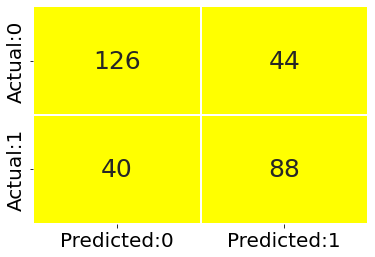

array([[126,  44],
       [ 40,  88]], dtype=int64)

In [77]:
def plot_confusion_matrix(model, test_data):
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['yellow']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

plot_confusion_matrix(ada_model_full,test_data = X_test)
confusion_matrix(y_test,y_pred_full)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [80]:
cm = confusion_matrix(y_test,y_pred_full)
cm

array([[126,  44],
       [ 40,  88]], dtype=int64)

In [81]:
total = cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]

In [93]:
#correctly_classified_percentage = ((TN+TP)/TOTAL)*100

In [94]:
correctly_classified_percentage = ((cm[0][0]+cm[1][1])/total)*100
round(correctly_classified_percentage,2)

71.81

In [95]:
#misclassified_percentage = ((FP+FN)/TOTAL)*100

In [98]:
misclassified_percentage = ((cm[0][1]+cm[1][0])/total)*100
round(misclassified_percentage,2)

28.19

In [101]:
sensitivity = (cm[1][1]/(cm[1][1]+cm[1][0]))
sensitivity

0.6875

In [104]:
specificity = (cm[0][0]/(cm[0][0]+cm[0][1]))
specificity

0.7411764705882353

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the best value of hyperparameters "n_estimators" and "learning_rate" for the adaboost full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

       n_estimators = [100, 120, 150, 200, 250, 300, 350],
       learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015]         

In [107]:
tuned_parameters = [{'n_estimators' :[100, 120, 150, 200, 250, 300, 350],
   'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015]}]

ada_grid = GridSearchCV(estimator=ada_model,param_grid=tuned_parameters,cv=3,scoring='accuracy')

ada_grid_model = ada_grid.fit(X_train,y_train)

ada_grid_model.best_params_


{'learning_rate': 0.15, 'n_estimators': 200}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a adaboost model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [111]:
from sklearn.model_selection import cross_val_score

In [114]:
ada_tuned=AdaBoostClassifier(learning_rate=0.15,n_estimators=200,random_state=10)
scores=cross_val_score(ada_tuned,X_train,y_train,cv=10,scoring='roc_auc')
print(scores)
np.mean(scores)

[0.90797721 0.83618234 0.82307692 0.86923077 0.81339031 0.82897727
 0.90340909 0.84005682 0.81306818 0.7421875 ]
Average ROC-AUC: 0.8377556413493913


<a id="gb"> </a>
## 2. Gradient Boosting

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Build the gradient boosting model 100 estimators and maximum depth 3. Also, find the accuracy score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [116]:
gb = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=10)

gb_model = gb.fit(X_train,y_train)

y_pred = gb_model.predict(X_test)

round(accuracy_score(y_test,y_pred),2)

0.85

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>12. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150, 200, 250, 300, 350],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        max_depth = [2, 3, 4, 5, 6]

In [ ]:
tuned_parameters = [{'n_estimators' : [100, 120, 150, 200, 250, 300, 350],
    'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015], 
    'max_depth' : [2, 3, 4, 5, 6]}]

gb = GradientBoostingClassifier(random_state=10)
gb_grid = GridSearchCV(estimator=gb,param_grid=tuned_parameters,cv=5,scoring='accuracy')

gb_grid_model = gb_grid.fit(X_train,y_train)

gb_grid_model.best_params_





#model running takes time, so taken ranodm values 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>13. Build the gradient boosting model and an adaboost model with their best parameters and generate a classification report for both of them. Which model is the best and why?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [120]:
gb_tuned =  GradientBoostingClassifier(learning_rate=0.2,n_estimators=150,max_depth=6,random_state=100)
gb_scores = cross_val_score(gb_tuned,X_train,y_train,cv =10,scoring='roc_auc')
gb_scores

array([0.97806268, 0.9980057 , 0.99259259, 0.98319088, 0.97350427,
       0.98920455, 0.99232955, 0.99204545, 0.96988636, 0.93605324])

In [123]:
np.mean(gb_scores)    #gboost

0.9804875275187775

In [124]:
np.mean(scores)     #adaboost 

0.8377556413493913

roc_auc is maximum for gboost so gradient boost is better model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Plot the area under the receiver operating characteristic curve for tuned gradient boosting model built in question 13. Also plot a confusion matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

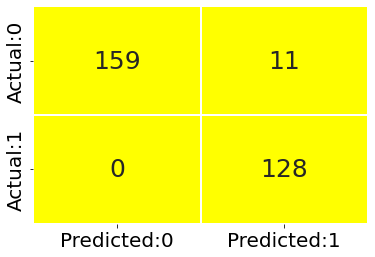

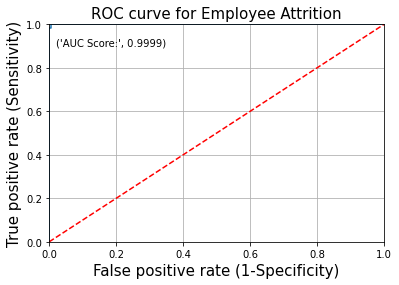

In [126]:
def plot_roc(model, test_data):
    y_pred_prob = model.predict_proba(test_data)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Employee Attrition', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)
    
    
gb_tuned_model=gb_tuned.fit(X_train,y_train)

plot_confusion_matrix(gb_tuned_model,test_data = X_test)

plot_roc(gb_tuned_model, test_data=X_test)  

<a id="xgb"> </a>
## 3. Extreme Gradient Boosting (XGBoost)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build the XGBoost model with a learning rate of 0.01 and gamma equal to 2. Calculate the roc_auc score and generate a classification rerport.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [127]:
xgb = XGBClassifier(random_state=199,learning_rate=0.01,gamma=2)
xgb_model = xgb.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
proba=xgb_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,proba[:,1])
roc_auc=auc(fpr,tpr)

In [128]:
roc_auc

0.9116038602941177

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       170
           1       0.82      0.84      0.83       128

    accuracy                           0.85       298
   macro avg       0.85      0.85      0.85       298
weighted avg       0.85      0.85      0.85       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>16. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the extreme gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        gamma = [2, 3, 4, 5, 6],
        max_depth = [2, 3, 4, 5, 6]

In [ ]:
tuned_parameters = [{'n_estimators' : [100, 120, 150],'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015],'gamma' : [2, 3, 4, 5, 6],'max_depth':[2,3,4,5,6]}]
xgb = XGBClassifier(random_state=10)
xgb_grid = GridSearchCV(estimator=xgb,param_grid=tuned_parameters,cv=5,scoring='roc_auc')

xgb_grid_model = xgb_grid.fit(X_train,y_train)

xgb_grid_model.best_params_



#machine taking long time , so taken random values 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>17. Plot the connfusion matrix for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

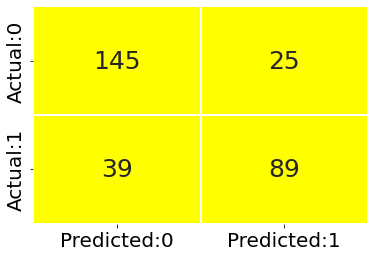

In [132]:
xgb_tuned=XGBClassifier(random_state=10,gamma=1,learning_rate=0.2,max_depth=4,n_estimators=10)
xgb_tuned_model=xgb_tuned.fit(X_train,y_train)
plot_confusion_matrix(xgb_tuned_model,test_data = X_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>18. Plot the area under the receiver operating characteristic curve for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

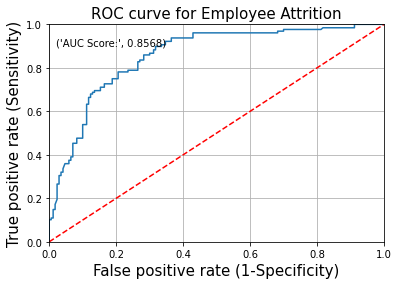

In [133]:
plot_roc(xgb_tuned_model, test_data=X_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>19. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Adaboost model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [135]:
df_num.shape

(1487, 11)

In [137]:
SS = StandardScaler()
num_scaled = SS.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)


df_num_scaled.index =np.arange(0,1487)
X = pd.concat([df_num_scaled,encoded_cat], axis = 1)

In [138]:
X.shape

(1487, 30)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
slow_learners = [('dt', DecisionTreeClassifier(random_state = 10)),
                 ('rf', RandomForestClassifier(random_state = 10))]

stack_model = StackingClassifier(estimators = slow_learners, final_estimator = AdaBoostClassifier(random_state = 10))

stack_model.fit(X_train, y_train)

proba = stack_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1])
roc_auc = auc(fpr, tpr)



In [144]:
roc_auc

0.9759446352798545

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>20. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Gradient Boosting model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [150]:
weak_learners = [('dt_model', DecisionTreeClassifier(random_state = 10)),
                 ('rf_model', RandomForestClassifier(random_state = 10))]


stack_model1 = StackingClassifier(estimators = weak_learners, final_estimator = GradientBoostingClassifier(learning_rate=0.1,n_estimators=150,max_depth=5,random_state = 10))


stack_model1.fit(X_train, y_train)

StackingClassifier(estimators=[('dt_model',
                                DecisionTreeClassifier(random_state=10)),
                               ('rf_model',
                                RandomForestClassifier(random_state=10))],
                   final_estimator=GradientBoostingClassifier(max_depth=5,
                                                              n_estimators=150,
                                                              random_state=10))

In [151]:
proba = stack_model1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9770559709032127